In [1]:
#import dependencies

import matplotlib.pyplot as plt
from pprint import pprint
import json
import random
import numpy as np
import pandas as pd
from owm_api import key
from citipy import citipy
import requests

In [2]:
# Step 1: Generate list of random cities

#Use random to generate a list of lat + long.
#Use citipy to find nearest city to coordinates

city = ''
cities = []

#this acts as a check to ensure that the generated city in loop is not a repeat
unique_cities_check = []

#Up to 10,000 attempts to create a list of 1000 unique cities
#In any given sample there's roughly 13% attrition in cities generated by CitiPy 
#which throws an error in OWM city search. Sample of 1000 is sufficient to confidently clear
#500+ cities.
for i in range(5000):

    if len(cities) < 1000:
        lat = random.uniform(-90.0,90.0)
        long = random.uniform(-180.0,180.0)
        
        city = citipy.nearest_city(lat,long)
        
        city_country = city.city_name + ' ' + city.country_code
        
        if city_country not in unique_cities_check:
            unique_cities_check.append(city_country)
            cities.append([city.city_name, city.country_code])
            
    else:
        break

In [3]:
# Step 2
# Generate weather data based on the city and country data from OpenWeatherMap API

url = 'https://api.openweathermap.org/data/2.5/weather'

#Weather outputs
weather_data_list = []

for i in range(len(cities)):
    city = cities[i][0]
    country = cities[i][1]
        
    query_params={'q': city + ',' + country,
                  'units': 'imperial',
                  'appid': key}
    
    response = requests.get(url, params = query_params).json()

    #try-except because not every city in CityPy is found in OWM, about 13% attrition
    try:
        weather_data_list.append({'City': city,
                                  'Country': country,
                                  'Longitude': response['coord']['lon'], 
                                  'Latitude': response['coord']['lat'],
                                  'Max Temperature': response['main']['temp_max'],
                                  'Humidity': response['main']['humidity'],
                                  'Cloud Cover': response['clouds']['all'],
                                  'Wind Speed': response['wind']['speed']
                                 })
        
    except:
        pass

In [4]:
cities_df = pd.DataFrame(weather_data_list)

cities_df = cities_df[['City',
                       'Country',
                       'Longitude',
                       'Latitude',
                       'Max Temperature',
                       'Humidity',
                       'Cloud Cover',
                       'Wind Speed']]



cities_df.head()

,City,Country,Longitude,Latitude,Max Temperature,Humidity,Cloud Cover,Wind Speed
0,vaini,to,-175.20,-21.20,77.00,78,75,10.29
1,rikitea,pf,-134.97,-23.12,73.55,100,92,24.99
2,torbay,ca,-52.73,47.66,50.00,87,90,14.99
3,busselton,au,115.35,-33.64,60.68,100,92,19.28
4,turukhansk,ru,87.96,65.80,66.26,77,12,4.52


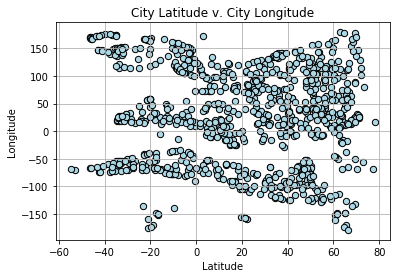

In [5]:
cities_df.plot.scatter('Latitude', 
                       'Longitude',
                       title='City Latitude v. City Longitude',
                       s=40,
                       color='LightBlue',
                       edgecolor='Black',
                       grid=True) 


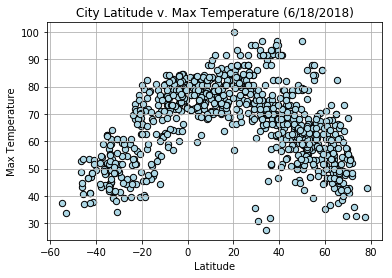

In [6]:
cities_df.plot.scatter('Latitude', 
                       'Max Temperature', 
                       title='City Latitude v. Max Temperature (6/18/2018)', 
                       marker='o', 
                       s=40, 
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)

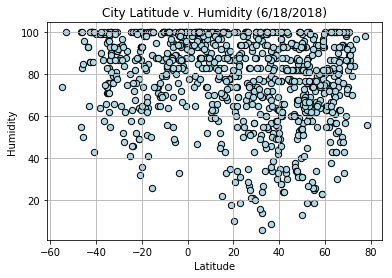

In [7]:
cities_df.plot.scatter('Latitude', 
                       'Humidity', 
                       title='City Latitude v. Humidity (6/18/2018)', 
                       marker='o', 
                       s=40, 
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)

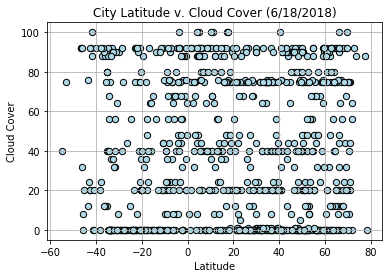

In [8]:
cities_df.plot.scatter('Latitude', 
                       'Cloud Cover', 
                       title='City Latitude v. Cloud Cover (6/18/2018)', 
                       marker='o', 
                       s=40, 
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)

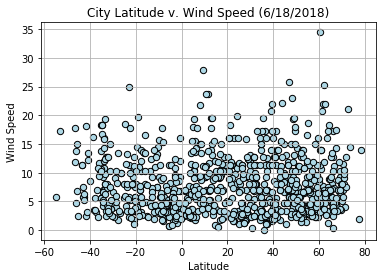

In [9]:
cities_df.plot.scatter('Latitude', 
                       'Wind Speed', 
                       title='City Latitude v. Wind Speed (6/18/2018)', 
                       marker='o', 
                       s=40, 
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)